In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('creditcard.csv.zip')

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


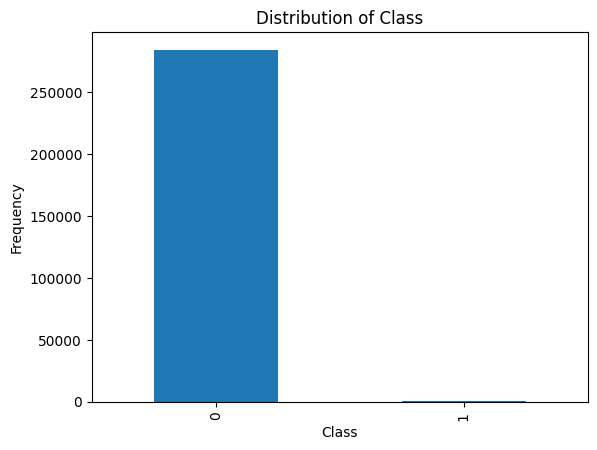

In [11]:
value = df['Class'].value_counts()
value.plot(kind = 'bar')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['Class'].value_counts()[0.000000]

np.int64(284315)

In [13]:
df['Class'].value_counts()[1.000000]

np.int64(492)

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

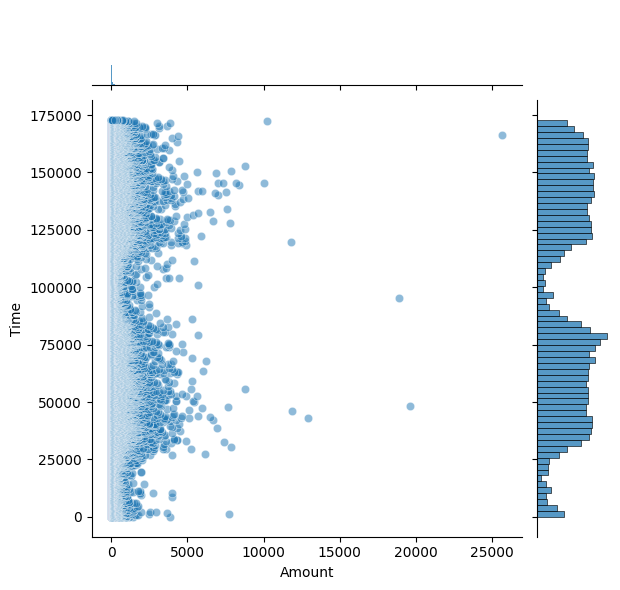

In [99]:
sns.jointplot(x='Amount', y='Time', data=normal, alpha=0.5)

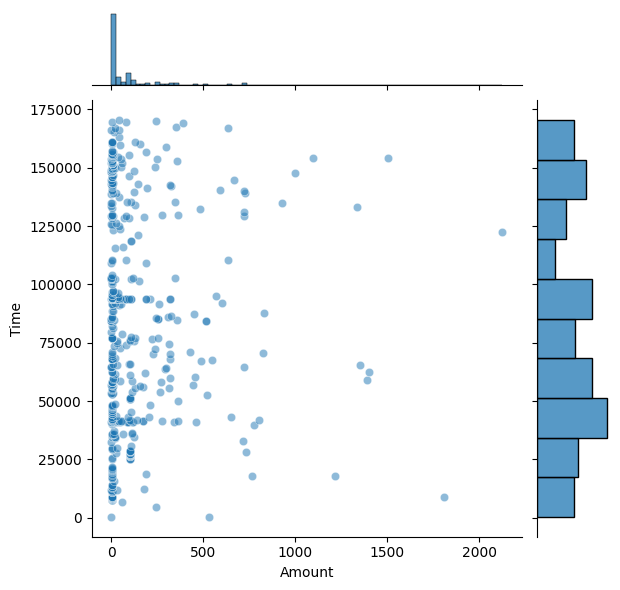

In [100]:
sns.jointplot(x='Amount', y='Time', data=fraud, alpha=0.5)

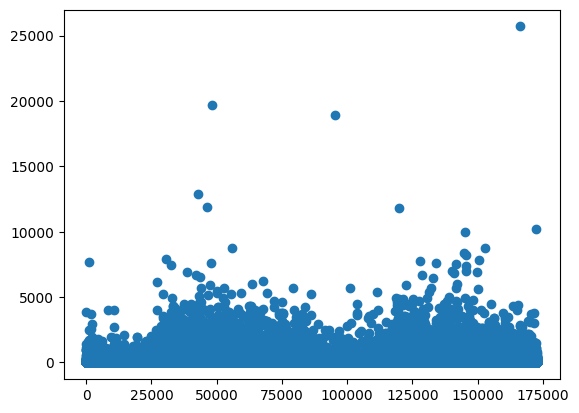

In [103]:
plt.scatter(normal['Time'],normal['Amount'])

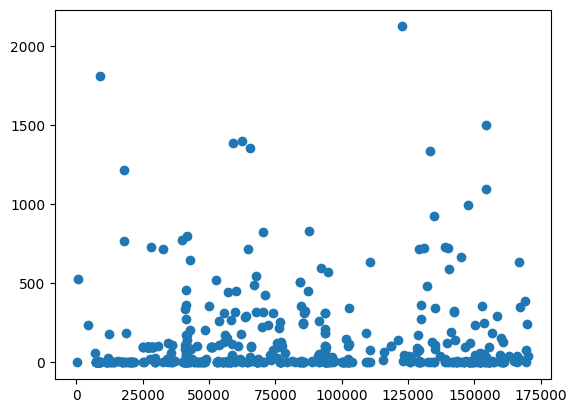

In [104]:
plt.scatter(fraud['Time'],fraud['Amount'])

<BarContainer object of 284315 artists>

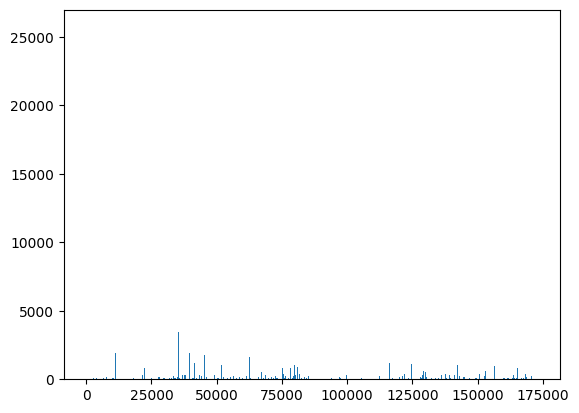

In [105]:
plt.bar(normal['Time'],normal['Amount'])

In [15]:
normal.shape


(284315, 31)

In [16]:
fraud.shape

(492, 31)

In [17]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [18]:
normal['Amount'].value_counts()[0.000000]

1798

In [19]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [20]:

fraud['Amount'].value_counts()[0.000000]

27

In [21]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


random undersampling


In [22]:
legit = normal.sample(n=492)

In [24]:
data = pd.concat([legit,fraud],axis=0)

In [25]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176689,122871.0,1.471428,-0.906621,-2.685521,0.559263,0.565341,-0.532019,0.797410,-0.348376,0.396121,...,-0.078587,-0.889200,-0.165663,-0.092409,-0.085212,0.343496,-0.143131,0.016591,347.58,0
121322,76150.0,-1.138932,1.313159,1.412146,1.468920,-0.395133,-0.154864,0.464830,0.289972,-0.715768,...,0.088386,0.365645,-0.209568,0.662429,0.068477,-0.250012,-0.172057,-0.012547,46.90,0
71118,54164.0,1.005826,-1.687026,-1.076341,-2.794881,-0.743584,-0.574394,0.044467,-0.262931,0.548657,...,-0.241860,-0.531516,-0.521521,-0.813528,0.933748,-0.629372,0.018668,0.037322,261.80,0
89025,62390.0,0.784985,-0.690212,0.894514,1.299230,-0.811195,0.746248,-0.606867,0.396667,0.633693,...,0.267656,0.516846,-0.242930,-0.315704,0.346549,-0.223209,0.041405,0.045083,170.00,0
250640,155004.0,0.081467,1.044686,0.243656,1.119552,0.541401,-0.618216,1.249125,-0.408644,-0.836779,...,0.121283,0.648514,-0.270029,0.075960,0.052821,0.212227,0.175122,0.153698,35.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


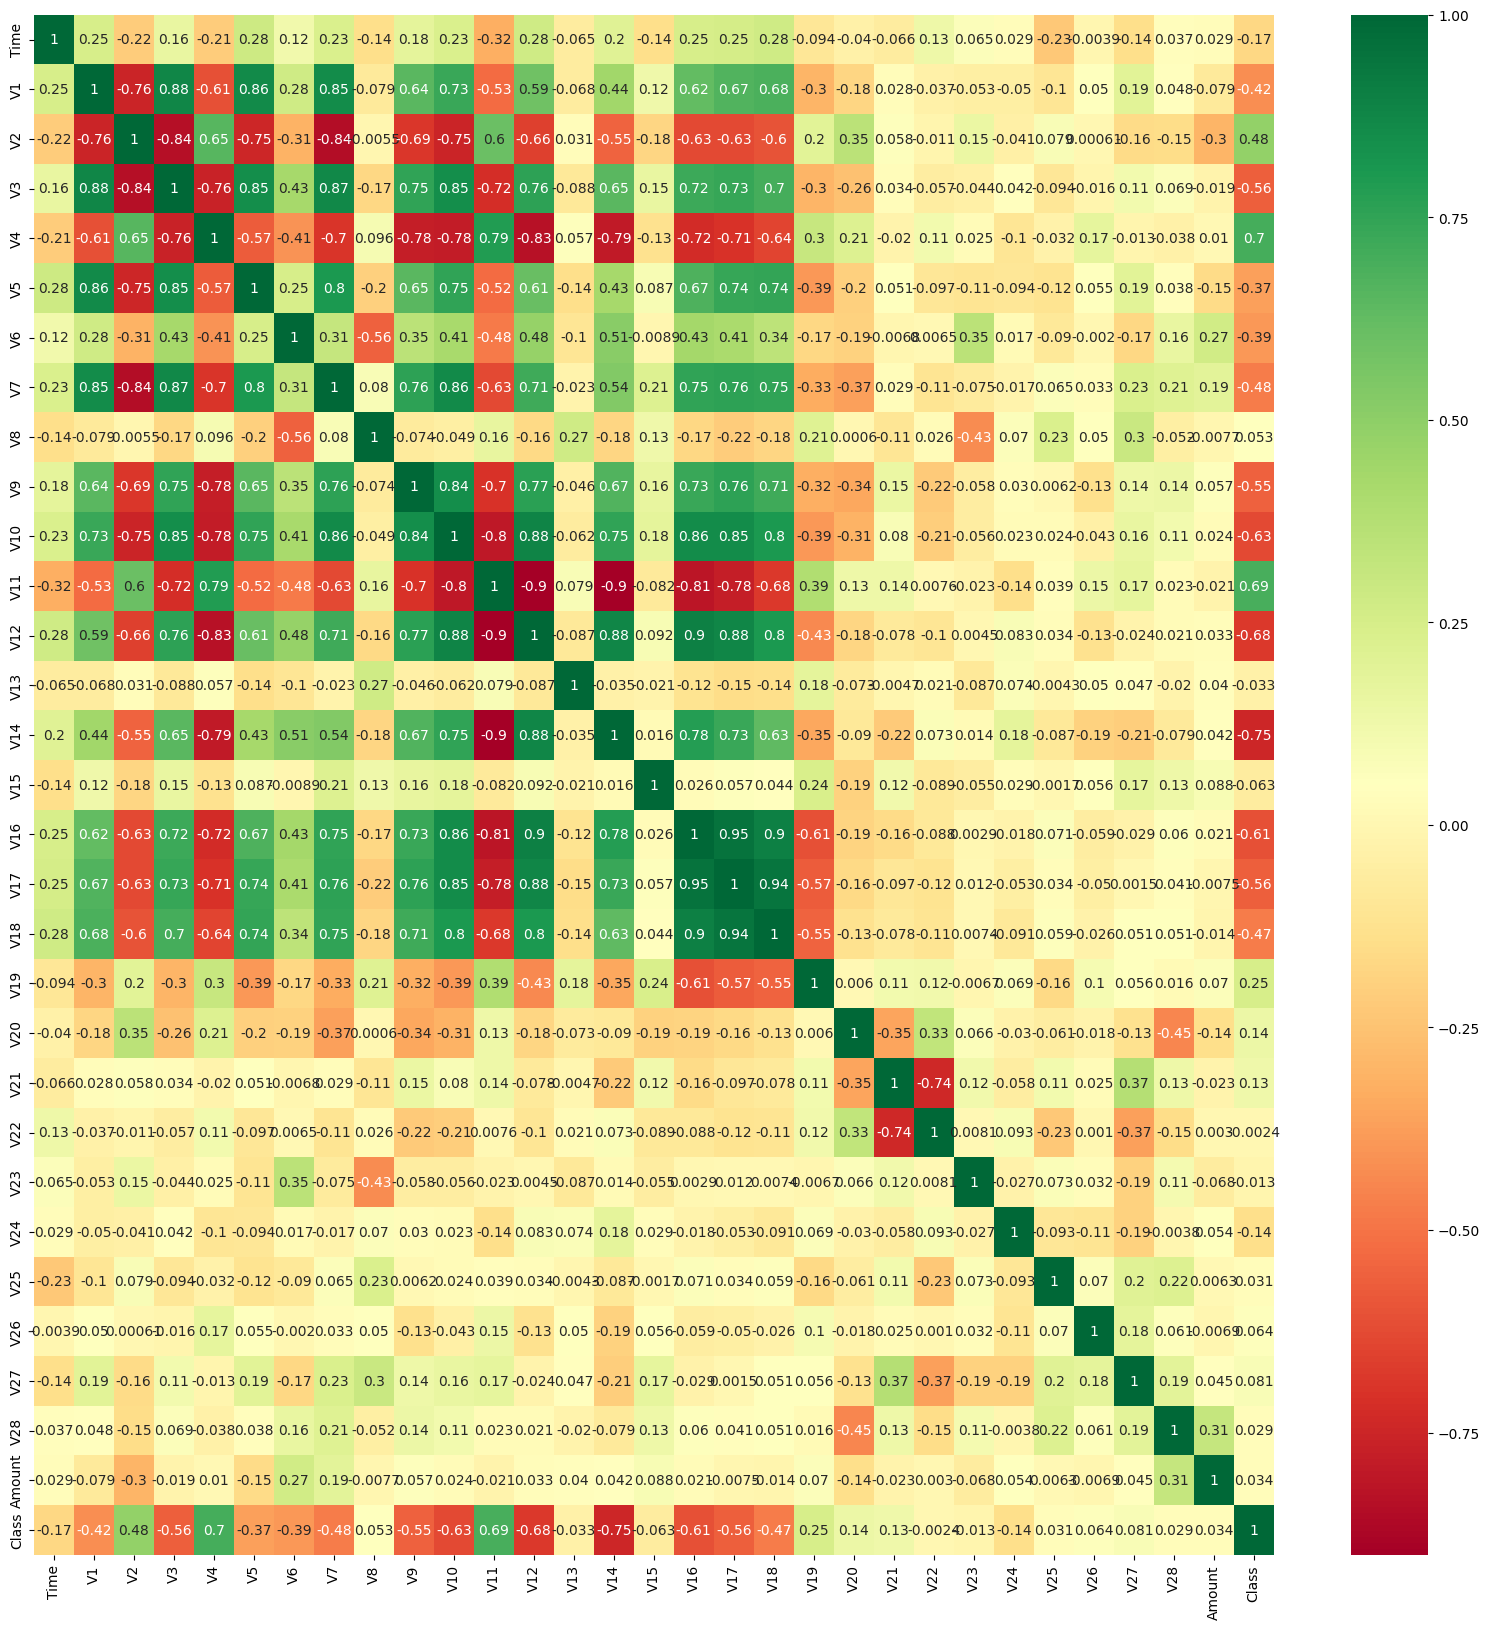

In [106]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
data['Class'].value_counts()[0]

492

In [28]:
data['Class'].value_counts()[1]

492

In [30]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96748.182927,-0.061097,-0.032862,-0.046112,0.063077,-0.035961,0.024552,0.050515,0.056218,-0.022153,...,-0.009865,-0.018952,0.019647,-0.010297,0.056539,0.001084,-0.008033,0.010174,0.039494,103.125508
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [54]:
X = data.drop(columns='Class',axis=1)
y = data['Class']

In [47]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
274947,166288.0,-0.796099,1.061970,-0.474693,3.157583,1.040500,-0.176683,1.660452,-0.301516,-1.707474,...,-0.814544,0.184079,0.749660,0.137344,-0.020223,-0.295867,0.081920,-0.300377,0.036446,97.19
4777,4241.0,0.793665,0.036865,1.589465,4.179874,-0.810372,0.432420,-0.496102,0.149933,0.881511,...,0.012762,0.028652,-0.018412,-0.136059,0.296331,0.239910,0.050395,-0.028113,0.055236,156.31
56703,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76
150684,93888.0,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1.00
6882,8808.0,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83
228140,145374.0,1.800012,-0.715036,0.730235,1.683000,-1.365547,0.399907,-1.282399,0.324859,2.063826,...,-0.239974,0.193872,0.900803,0.139903,-0.018196,-0.248487,-0.520577,0.112896,-0.013287,37.82
143335,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
234647,148059.0,1.665954,0.660636,-0.767531,4.101716,0.407635,0.495569,-0.494718,0.279939,-0.724738,...,0.049976,-0.053942,-0.212030,0.167049,-0.764453,-0.512031,-0.189961,0.060772,0.048198,75.10


In [72]:
y

,Class
176689,0
121322,0
71118,0
89025,0
250640,0
...,...
279863,1
280143,1
280149,1
281144,1


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,stratify=y,random_state = 2)

In [80]:
print(y_train)

100623    1
246959    0
236985    0
122553    0
253208    0
         ..
188127    0
160714    0
223618    1
43061     1
57477     0
Name: Class, Length: 787, dtype: int64


In [81]:
 lm = LogisticRegression()

In [82]:
lm.fit(X_train,y_train)

LogisticRegression()

In [84]:
lm.coef_

array([[-2.59631191e-05, -1.48299412e-02,  1.42322340e-01,
        -6.31818829e-01,  5.99108210e-01,  2.62257565e-01,
        -2.38037758e-01, -1.77864651e-02, -4.19935254e-01,
        -4.13036251e-01, -5.34520563e-01,  2.09050093e-01,
        -4.69966149e-01, -9.87976902e-02, -8.68739184e-01,
        -1.41831790e-01, -4.41832208e-01, -4.46013610e-01,
         7.77897119e-03,  6.63308668e-02,  7.17630697e-02,
         1.49256855e-01,  2.44951079e-01,  2.56355039e-02,
         5.46456471e-02, -1.82329037e-01, -3.96352220e-02,
         3.65007871e-03, -3.66985611e-02,  2.99370925e-04]])

ValueError: Index data must be 1-dimensional

In [88]:
predictions = lm.predict(X_test)
print(predictions)

[1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [89]:
accuracy = accuracy_score(predictions,y_test)

In [90]:
print(accuracy)

0.934010152284264


In [91]:
predictions_train = lm.predict(X_train)

In [92]:
accuracy_train = accuracy_score(predictions_train,y_train)

In [93]:
print(accuracy_train)

0.9428208386277002


In [ ]:
X1 = df.drop(columns='Class',axis=1)
y1 = df['Class']